In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%cd /content/drive/My Drive/datasets

/content/drive/My Drive/datasets


In [3]:
f1 = pd.read_csv('Final_Training_Dataset.csv',low_memory=False)

In [4]:
f1 = f1.loc[:, ~f1.columns.str.contains('^Unnamed')]
f1

,rank,stime,ltime,dur,runtime,saddr,daddr,proto,tpkts,spkts,dpkts,tbytes,sbytes,dbytes,load,rate,srate,drate,sport,dport,Label,Tpkt_Saddr,Tportcnt_Saddr,Tdaddrcnt_Saddr,Tbytes_Saddr,Tbytes_Daddr,Tpkt_Daddr,Tsaddrcnt_Daddr,Tportcnt_Daddr
0,430913,1528095736,1528095740,4.290363,4.290363,192.168.100.147,192.168.100.3,tcp,2,2,0,308,308,0,287.155,0.233081,0.233081,0.000000,57803,http,1,533247,230510,230510,44869718,8315130,85592,555559,555559
1,55661,1528095723,1528095723,0.000000,0.000000,192.168.100.149,192.168.100.3,tcp,1,1,0,154,154,0,0.000,0.000000,0.000000,0.000000,10988,http,1,304464,185950,185950,28884294,8315130,85592,555559,555559
2,231372,1528095730,1528095730,0.311577,0.311577,192.168.100.149,192.168.100.3,tcp,3,2,1,274,214,60,2747.310,6.418959,3.209480,0.000000,58423,http,1,304464,185950,185950,28884294,8315130,85592,555559,555559
3,87625,1528095724,1528095724,0.000000,0.000000,192.168.100.149,192.168.100.3,tcp,1,1,0,154,154,0,0.000,0.000000,0.000000,0.000000,19039,http,1,304464,185950,185950,28884294,8315130,85592,555559,555559
4,196043,1528095728,1528095728,0.000000,0.000000,192.168.100.149,192.168.100.3,tcp,1,1,0,154,154,0,0.000,0.000000,0.000000,0.000000,48403,http,1,304464,185950,185950,28884294,8315130,85592,555559,555559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,221309,1540796574,1540796574,0.000497,0.000497,192.168.1.165,192.168.1.1,udp,2,1,1,166,75,91,0.000,2012.072388,0.000000,0.000000,3247,domain,4,152716,38736,38736,15347748,10138227,38230,29851,29851
999996,62057,1540749825,1540749825,0.000000,0.000000,192.168.1.239,23.23.189.20,udp,1,1,0,191,191,0,0.000,0.000000,0.000000,0.000000,53054,40317,4,15365,9812,9812,2130243,1224,4,5121,5121
999997,252728,1540805792,1540805793,0.254849,0.254849,fe80::16cc:20ff:f,ff02::c,udp,49,49,0,25400,25400,0,781074.000,188.346832,188.346832,0.000000,36191,1900,4,108647,4665,4665,54912899,0,0,2321,2321
999998,65443,1540750819,1540750819,0.207460,0.207460,192.168.1.216,34.206.97.198,tcp,3,1,2,497,197,300,5784.240,9.640412,0.000000,4.820206,38828,https,4,32386,13493,13493,10070790,282980,1855,920,920


In [5]:
f1.isnull().any()

rank               False
stime              False
ltime              False
dur                False
runtime            False
saddr              False
daddr              False
proto              False
tpkts              False
spkts              False
dpkts              False
tbytes             False
sbytes             False
dbytes             False
load               False
rate               False
srate              False
drate              False
sport              False
dport              False
Label              False
Tpkt_Saddr         False
Tportcnt_Saddr     False
Tdaddrcnt_Saddr    False
Tbytes_Saddr       False
Tbytes_Daddr       False
Tpkt_Daddr         False
Tsaddrcnt_Daddr    False
Tportcnt_Daddr     False
dtype: bool

In [6]:
f1.describe()

,rank,stime,ltime,dur,runtime,tpkts,spkts,dpkts,tbytes,sbytes,dbytes,load,rate,srate,drate,Label,Tpkt_Saddr,Tportcnt_Saddr,Tdaddrcnt_Saddr,Tbytes_Saddr,Tbytes_Daddr,Tpkt_Daddr,Tsaddrcnt_Daddr,Tportcnt_Daddr
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000
mean,358765.059709,1.530629e+09,1.530629e+09,1.795886,1.796237,3.203467,2.630642,0.572825,6.965336e+02,4.795354e+02,2.169982e+02,3.875785e+04,98.138072,23.346975,6.270971,2.450000,342059.190291,165307.975592,165307.975592,3.123449e+07,5.725356e+06,52258.725579,330801.431214,330801.431214
std,249693.455615,5.073074e+06,5.073074e+06,2.005596,2.005630,11.903806,6.295791,6.983432,1.061164e+04,3.485536e+03,9.459047e+03,2.688722e+05,550.461074,293.077507,55.487548,1.071215,161909.392293,77462.239094,77462.239094,1.385187e+07,5.055797e+06,38243.143383,252551.796914,252551.796914
min,1.000000,1.528081e+09,1.528081e+09,0.000000,0.000000,1.000000,0.000000,0.000000,5.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,9.000000e+01,0.000000e+00,0.000000,1.000000,1.000000
25%,147408.000000,1.528085e+09,1.528085e+09,0.000000,0.000000,1.000000,1.000000,0.000000,1.540000e+02,1.200000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.750000,304464.000000,171476.000000,171476.000000,2.888429e+07,7.698000e+05,6284.000000,67302.000000,67302.000000
50%,301871.500000,1.528096e+09,1.528096e+09,0.209054,0.209164,2.000000,2.000000,0.000000,1.800000e+02,1.540000e+02,0.000000e+00,1.375145e+02,0.367476,0.236578,0.000000,2.500000,352257.000000,185950.000000,185950.000000,2.903659e+07,8.315130e+06,85592.000000,555559.000000,555559.000000
75%,560177.250000,1.528099e+09,1.528099e+09,4.056397,4.056397,3.000000,3.000000,0.000000,2.740000e+02,2.140000e+02,0.000000e+00,3.476010e+02,1.003649,0.496828,0.000000,3.000000,421719.000000,211981.000000,211981.000000,3.747924e+07,8.315130e+06,85592.000000,555559.000000,555559.000000
max,999996.000000,1.540818e+09,1.540818e+09,4.999999,4.999999,3225.000000,1070.000000,2155.000000,3.311546e+06,1.175662e+06,3.240420e+06,9.995197e+06,22727.273440,22727.273440,8888.888672,4.000000,533247.000000,230510.000000,230510.000000,1.165039e+08,1.047178e+08,85592.000000,555559.000000,555559.000000


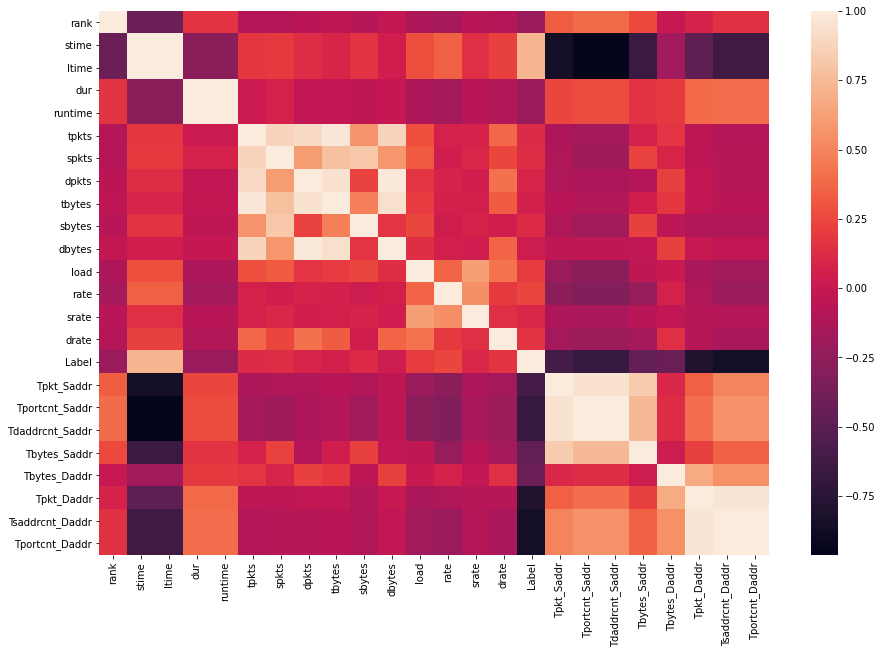

In [7]:
# Finding Correlation graph
cr = f1.corr()
plt.subplots(figsize=(15,10))
sb.heatmap(cr)

In [8]:
x = cr.unstack()
c = x.sort_values()
c['Label']

Tportcnt_Daddr    -0.860512
Tsaddrcnt_Daddr   -0.860512
Tpkt_Daddr        -0.786900
Tdaddrcnt_Saddr   -0.685869
Tportcnt_Saddr    -0.685869
Tpkt_Saddr        -0.607352
Tbytes_Saddr      -0.461612
Tbytes_Daddr      -0.425936
rank              -0.208513
runtime           -0.207361
dur               -0.207128
dbytes             0.030448
tbytes             0.064591
dpkts              0.085889
srate              0.103174
sbytes             0.114014
tpkts              0.121184
spkts              0.133859
drate              0.163370
load               0.197403
rate               0.244673
ltime              0.722813
stime              0.722813
Label              1.000000
dtype: float64

In [9]:
out = f1['Label']

In [10]:
f1.columns

Index(['rank', 'stime', 'ltime', 'dur', 'runtime', 'saddr', 'daddr', 'proto',
       'tpkts', 'spkts', 'dpkts', 'tbytes', 'sbytes', 'dbytes', 'load', 'rate',
       'srate', 'drate', 'sport', 'dport', 'Label', 'Tpkt_Saddr',
       'Tportcnt_Saddr', 'Tdaddrcnt_Saddr', 'Tbytes_Saddr', 'Tbytes_Daddr',
       'Tpkt_Daddr', 'Tsaddrcnt_Daddr', 'Tportcnt_Daddr'],
      dtype='object')

In [11]:
# Dropping unnecessary columns
f1 = f1.drop(['Label','proto','saddr','daddr','sport','dport','rank','load','stime','ltime'],axis='columns') #rank,load,stime,ltime

In [12]:
f1.columns

Index(['dur', 'runtime', 'tpkts', 'spkts', 'dpkts', 'tbytes', 'sbytes',
       'dbytes', 'rate', 'srate', 'drate', 'Tpkt_Saddr', 'Tportcnt_Saddr',
       'Tdaddrcnt_Saddr', 'Tbytes_Saddr', 'Tbytes_Daddr', 'Tpkt_Daddr',
       'Tsaddrcnt_Daddr', 'Tportcnt_Daddr'],
      dtype='object')

In [13]:
# Z-score Normalisation
f1 = (f1-f1.mean())/f1.std()

In [14]:
f1.shape

(1000000, 19)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(f1, out, test_size=0.3,random_state=42)

In [ ]:
# Random Forests
clf1 = RandomForestClassifier(n_estimators=100, max_depth=19, random_state=0)
clf1.fit(x_train,y_train)

y_pred2=clf1.predict(x_test)

print(accuracy_score(y_test,y_pred2)*100)
conf_mat= confusion_matrix(y_test, y_pred2)
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2)) 

98.75633333333333
[[74313   100   797     0]
 [    0 74536   197     1]
 [  145  2490 87320     1]
 [    0     0     0 60100]]
              precision    recall  f1-score   support

           1       1.00      0.99      0.99     75210
           2       0.97      1.00      0.98     74734
           3       0.99      0.97      0.98     89956
           4       1.00      1.00      1.00     60100

    accuracy                           0.99    300000
   macro avg       0.99      0.99      0.99    300000
weighted avg       0.99      0.99      0.99    300000



In [ ]:
conf_mat= confusion_matrix(y_test, y_pred2)
print(classification_report(y_test, y_pred2)) 
#TN
TP = []
TN = []
FP = []
FN=[]
for k in tqdm(range(len(conf_mat))):
    TP.append(conf_mat[k][k])
    sum = 0
    for i in range(len(conf_mat)):  #TN
        for j in range(len(conf_mat)):
            if i==j:
                sum = sum+conf_mat[i][i]
    TN.append(sum-TP[k])
    sum2=0
    #FP
    for i in range(len(conf_mat)):
        sum2 = sum2+conf_mat[i][k]
    FP.append(sum2-TP[k])
    #FN
    sum3=0
    for i in range(len(conf_mat)):
        sum3 = sum3+conf_mat[k][i]
    FN.append(sum3-TP[k])
    
    
print(TP)
print(TN)
print(FP)
print(FN)


for i in range(len(conf_mat)):
    print("FOR "+str(i+1)+ " class")
    false_alarm_rate = (FP[i] / float(TN[i] + FP[i]))*100
    print("False Alarm Rate: ",false_alarm_rate)
    undetected_rate = (FN[i] / float(TP[i] + FN[i]))*100
    print("Undetected Rate: " ,undetected_rate)
    


100%|██████████| 4/4 [00:00<00:00, 1160.09it/s]

              precision    recall  f1-score   support

           1       1.00      0.99      0.99     75210
           2       0.97      1.00      0.98     74734
           3       0.99      0.97      0.98     89956
           4       1.00      1.00      1.00     60100

    accuracy                           0.99    300000
   macro avg       0.99      0.99      0.99    300000
weighted avg       0.99      0.99      0.99    300000

[74313, 74536, 87320, 60100]
[221956, 221733, 208949, 236169]
[145, 2590, 994, 2]
[897, 198, 2636, 0]
FOR 1 class
False Alarm Rate:  0.06528561330205628
Undetected Rate:  1.1926605504587156
FOR 2 class
False Alarm Rate:  1.1545851294784752
Undetected Rate:  0.26493965263467767
FOR 3 class
False Alarm Rate:  0.47346184440538625
Undetected Rate:  2.93032149050647
FOR 4 class
False Alarm Rate:  0.0008468440240334335
Undetected Rate:  0.0


In [ ]:
# Decision Trees 
from sklearn.tree import DecisionTreeClassifier

#classification via gini-index

clf_gini = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=19,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, splitter='best')
#min_samples_leaf = min no of samples required for further splitting of trees
clf_gini.fit(x_train, y_train)
clf_gini
y_pred = clf_gini.predict(x_test)
y_pred
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test, y_pred))  
conf_mat= confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred)) 

#TN
TP = []
TN = []
FP = []
FN=[]
for k in range(len(conf_mat)):
    TP.append(conf_mat[k][k])
    sum = 0
    for i in range(len(conf_mat)):  #TN
        for j in range(len(conf_mat)):
            if i==j:
                sum = sum+conf_mat[i][i]
    TN.append(sum-TP[k])
    sum2=0
    #FP
    for i in range(len(conf_mat)):
        sum2 = sum2+conf_mat[i][k]
    FP.append(sum2-TP[k])
    #FN
    sum3=0
    for i in range(len(conf_mat)):
        sum3 = sum3+conf_mat[k][i]
    FN.append(sum3-TP[k])
    
    
print(TP)
print(TN)
print(FP)
print(FN)


for i in range(len(conf_mat)):
    print("FOR "+str(i+1)+ " class")
    false_alarm_rate = (FP[i] / float(TN[i] + FP[i]))*100
    print("False Alarm Rate: ",false_alarm_rate)
    undetected_rate = (FN[i] / float(TP[i] + FN[i]))*100
    print("Undetected Rate: " ,undetected_rate)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


Accuracy is  98.59933333333333
[[73922   100  1188     0]
 [    0 74659    74     1]
 [  240  2598 87117     1]
 [    0     0     0 60100]]
              precision    recall  f1-score   support

           1       1.00      0.98      0.99     75210
           2       0.97      1.00      0.98     74734
           3       0.99      0.97      0.98     89956
           4       1.00      1.00      1.00     60100

    accuracy                           0.99    300000
   macro avg       0.99      0.99      0.99    300000
weighted avg       0.99      0.99      0.99    300000

[73922, 74659, 87117, 60100]
[221876, 221139, 208681, 235698]
[240, 2698, 1262, 2]
[1288, 75, 2839, 0]
FOR 1 class
False Alarm Rate:  0.1080516486880729
Undetected Rate:  1.7125382262996942
FOR 2 class
False Alarm Rate:  1.2053413868127254
Undetected Rate:  0.100355929028287
FOR 3 class
False Alarm Rate:  0.6011155408849069
Undetected Rate:  3.1559873716038953
FOR 4 class
False Alarm Rate:  0.0008485362749257532
Undetecte

In [ ]:
clf3 = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=19,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, splitter='best')
clf3.fit(x_train, y_train)
y_pred_en = clf3.predict(x_test)
y_pred_en
print("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)
print(confusion_matrix(y_test, y_pred))  
conf_mat= confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred)) 


#TN
TP = []
TN = []
FP = []
FN=[]
for k in range(len(conf_mat)):
    TP.append(conf_mat[k][k])
    sum = 0
    for i in range(len(conf_mat)):  #TN
        for j in range(len(conf_mat)):
            if i==j:
                sum = sum+conf_mat[i][i]
    TN.append(sum-TP[k])
    sum2=0
    #FP
    for i in range(len(conf_mat)):
        sum2 = sum2+conf_mat[i][k]
    FP.append(sum2-TP[k])
    #FN
    sum3=0
    for i in range(len(conf_mat)):
        sum3 = sum3+conf_mat[k][i]
    FN.append(sum3-TP[k])
    
    
print(TP)
print(TN)
print(FP)
print(FN)


for i in range(len(conf_mat)):
    print("FOR "+str(i+1)+ " class")
    false_alarm_rate = (FP[i] / float(TN[i] + FP[i]))*100
    print("False Alarm Rate: ",false_alarm_rate)
    undetected_rate = (FN[i] / float(TP[i] + FN[i]))*100
    print("Undetected Rate: " ,undetected_rate)
    


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


Accuracy is  98.55766666666666
[[73922   100  1188     0]
 [    0 74659    74     1]
 [  240  2598 87117     1]
 [    0     0     0 60100]]
              precision    recall  f1-score   support

           1       1.00      0.98      0.99     75210
           2       0.97      1.00      0.98     74734
           3       0.99      0.97      0.98     89956
           4       1.00      1.00      1.00     60100

    accuracy                           0.99    300000
   macro avg       0.99      0.99      0.99    300000
weighted avg       0.99      0.99      0.99    300000

[73922, 74659, 87117, 60100]
[221876, 221139, 208681, 235698]
[240, 2698, 1262, 2]
[1288, 75, 2839, 0]
FOR 1 class
False Alarm Rate:  0.1080516486880729
Undetected Rate:  1.7125382262996942
FOR 2 class
False Alarm Rate:  1.2053413868127254
Undetected Rate:  0.100355929028287
FOR 3 class
False Alarm Rate:  0.6011155408849069
Undetected Rate:  3.1559873716038953
FOR 4 class
False Alarm Rate:  0.0008485362749257532
Undetecte

In [ ]:
#KNN
#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier  
clf2 = KNeighborsClassifier(n_neighbors=5)  
clf2.fit(x_train, y_train) 
#The final step is to make predictions on our test data. To do so, execute the following script:
y_pred = clf2.predict(x_test) 

In [ ]:
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test, y_pred))  
conf_mat= confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred)) 
#TN
TP = []
TN = []
FP = []
FN=[]
for k in range(len(conf_mat)):
    TP.append(conf_mat[k][k])
    sum = 0
    for i in range(len(conf_mat)):  #TN
        for j in range(len(conf_mat)):
            if i==j:
                sum = sum+conf_mat[i][i]
    TN.append(sum-TP[k])
    sum2=0
    #FP
    for i in range(len(conf_mat)):
        sum2 = sum2+conf_mat[i][k]
    FP.append(sum2-TP[k])
    #FN
    sum3=0
    for i in range(len(conf_mat)):
        sum3 = sum3+conf_mat[k][i]
    FN.append(sum3-TP[k])
    
    
print(TP)
print(TN)
print(FP)
print(FN)

for i in range(len(conf_mat)):
    print("FOR "+str(i+1)+ " class")
    false_alarm_rate = (FP[i] / float(TN[i] + FP[i]))*100
    print("False Alarm Rate: ",false_alarm_rate)
    undetected_rate = (FN[i] / float(TP[i] + FN[i]))*100
    print("Undetected Rate: " ,undetected_rate)

Accuracy is  99.46633333333334
[[74827   100   277     6]
 [    1 74723     9     1]
 [  332   868 88753     3]
 [    4     0     0 60096]]
              precision    recall  f1-score   support

           1       1.00      0.99      1.00     75210
           2       0.99      1.00      0.99     74734
           3       1.00      0.99      0.99     89956
           4       1.00      1.00      1.00     60100

    accuracy                           0.99    300000
   macro avg       0.99      1.00      1.00    300000
weighted avg       0.99      0.99      0.99    300000

[74827, 74723, 88753, 60096]
[223572, 223676, 209646, 238303]
[337, 968, 286, 10]
[383, 11, 1203, 4]
FOR 1 class
False Alarm Rate:  0.15050757227266434
Undetected Rate:  0.5092407924478128
FOR 2 class
False Alarm Rate:  0.43090400811951357
Undetected Rate:  0.014718869590815427
FOR 3 class
False Alarm Rate:  0.13623459024827086
Undetected Rate:  1.33732046778425
FOR 4 class
False Alarm Rate:  0.00419616219006097
Undetecte

In [ ]:
# Stacking
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import warnings

lr = LogisticRegression()
warnings.simplefilter('ignore')
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['Random Forest', 
                       'KNN',
                       'DT',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, f1, out, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


3-fold cross validation:

Accuracy: 0.99 (+/- 0.01) [Random Forest]
Accuracy: 0.99 (+/- 0.00) [KNN]
Accuracy: 0.98 (+/- 0.01) [DT]
Accuracy: 0.99 (+/- 0.00) [StackingClassifier]


In [ ]:
conf_mat= confusion_matrix(y_test, y_pred)
    #TN
TP = []
TN = []
FP = []
FN=[]
for k in range(len(conf_mat)):
    TP.append(conf_mat[k][k])
    sum = 0
    for i in range(len(conf_mat)):  #TN
        for j in range(len(conf_mat)):
            if i==j:
                sum = sum+conf_mat[i][i]
    TN.append(sum-TP[k])
    sum2=0
    #FP
    for i in range(len(conf_mat)):
        sum2 = sum2+conf_mat[i][k]
    FP.append(sum2-TP[k])
    #FN
    sum3=0
    for i in range(len(conf_mat)):
        sum3 = sum3+conf_mat[k][i]
    FN.append(sum3-TP[k])
    
    
print(TP)
print(TN)
print(FP)
print(FN)


for i in range(len(conf_mat)):
    print("FOR "+str(i+1)+ " class")
    false_alarm_rate = (FP[i] / float(TN[i] + FP[i]))*100
    print("False Alarm Rate: ",false_alarm_rate)
    undetected_rate = (FN[i] / float(TP[i] + FN[i]))*100
    print("Undetected Rate: " ,undetected_rate)

[74827, 74723, 88753, 60096]
[223572, 223676, 209646, 238303]
[337, 968, 286, 10]
[383, 11, 1203, 4]
FOR 1 class
False Alarm Rate:  0.15050757227266434
Undetected Rate:  0.5092407924478128
FOR 2 class
False Alarm Rate:  0.43090400811951357
Undetected Rate:  0.014718869590815427
FOR 3 class
False Alarm Rate:  0.13623459024827086
Undetected Rate:  1.33732046778425
FOR 4 class
False Alarm Rate:  0.00419616219006097
Undetected Rate:  0.006655574043261231


In [17]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(x_train, y_train) 
gnb_predictions = gnb.predict(x_test) 
# accuracy on X_test 
accuracy = gnb.score(x_test, y_test) 
print(accuracy*100)
conf_mat= confusion_matrix(y_test, gnb_predictions)
print(confusion_matrix(y_test, gnb_predictions))  
print(classification_report(y_test, gnb_predictions)) 

74.27466666666666
[[14770 60428     0    12]
 [    1 74729     0     4]
 [ 4560 12150 73225    21]
 [    0     0     0 60100]]
              precision    recall  f1-score   support

           1       0.76      0.20      0.31     75210
           2       0.51      1.00      0.67     74734
           3       1.00      0.81      0.90     89956
           4       1.00      1.00      1.00     60100

    accuracy                           0.74    300000
   macro avg       0.82      0.75      0.72    300000
weighted avg       0.82      0.74      0.72    300000



In [18]:
conf_mat= confusion_matrix(y_test, gnb_predictions)
    #TN
TP = []
TN = []
FP = []
FN=[]
for k in range(len(conf_mat)):
    TP.append(conf_mat[k][k])
    sum = 0
    for i in range(len(conf_mat)):  #TN
        for j in range(len(conf_mat)):
            if i==j:
                sum = sum+conf_mat[i][i]
    TN.append(sum-TP[k])
    sum2=0
    #FP
    for i in range(len(conf_mat)):
        sum2 = sum2+conf_mat[i][k]
    FP.append(sum2-TP[k])
    #FN
    sum3=0
    for i in range(len(conf_mat)):
        sum3 = sum3+conf_mat[k][i]
    FN.append(sum3-TP[k])
    
    
print(TP)
print(TN)
print(FP)
print(FN)


for i in range(len(conf_mat)):
    print("FOR "+str(i+1)+ " class")
    false_alarm_rate = (FP[i] / float(TN[i] + FP[i]))*100
    print("False Alarm Rate: ",false_alarm_rate)
    undetected_rate = (FN[i] / float(TP[i] + FN[i]))*100
    print("Undetected Rate: " ,undetected_rate)

[14770, 74729, 73225, 60100]
[208054, 148095, 149599, 162724]
[4561, 72578, 0, 37]
[60440, 5, 16731, 0]
FOR 1 class
False Alarm Rate:  2.145192013733744
Undetected Rate:  80.36165403536764
FOR 2 class
False Alarm Rate:  32.88938837102863
Undetected Rate:  0.006690395268552466
FOR 3 class
False Alarm Rate:  0.0
Undetected Rate:  18.599092889857264
FOR 4 class
False Alarm Rate:  0.022732718525936804
Undetected Rate:  0.0
